# 1 Data Preprocessing

### 1.1 Importing necessary packages

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### 1.2 Loading the datset

In [45]:
df = pd.read_csv("Data/train.csv")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [47]:
df.head(5)

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


### 1.3 Removing unnecessary columns

In [48]:
# We dont need "id" here
df.pop('id')
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


### 1.4 Visualizing the distributions of the variables

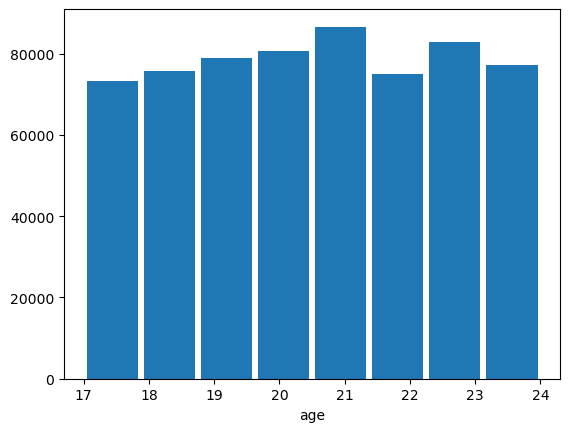

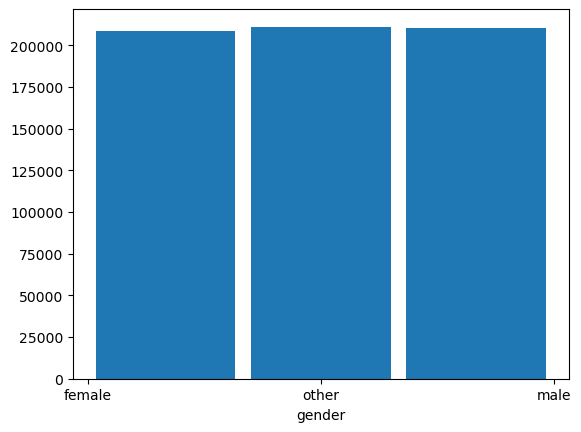

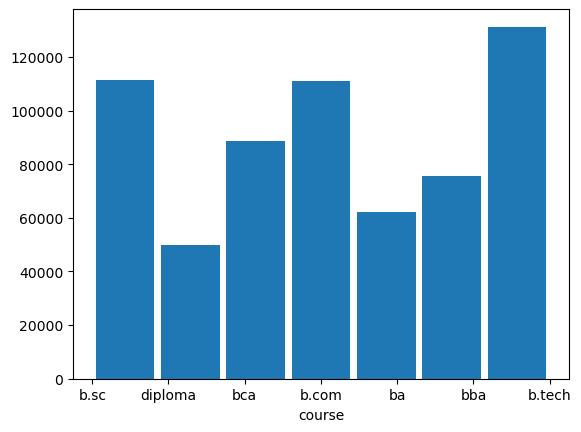

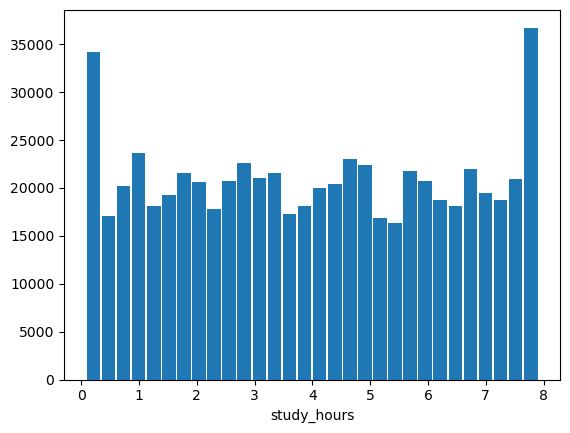

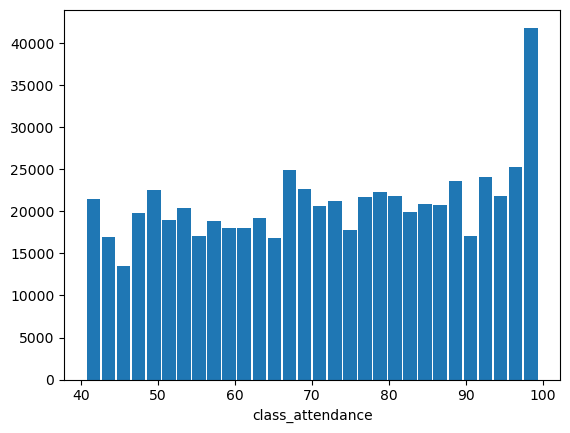

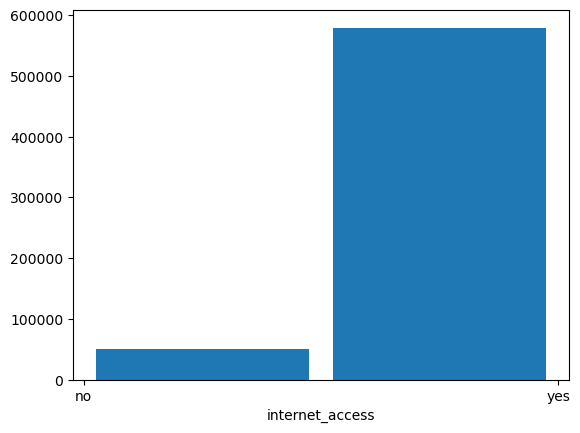

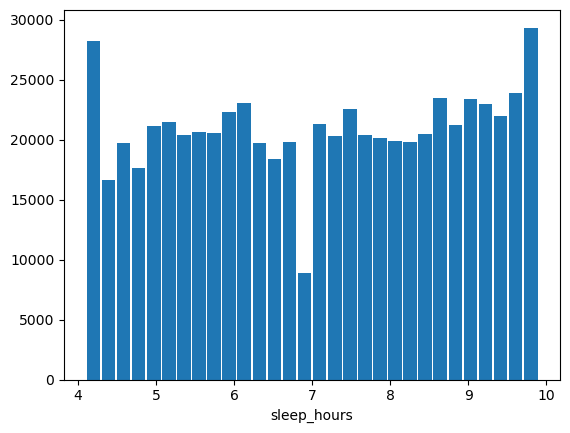

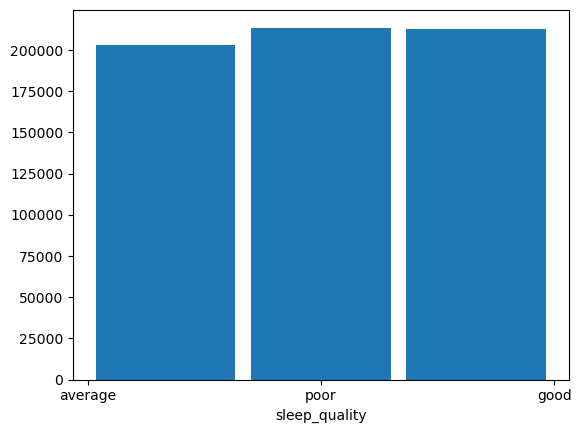

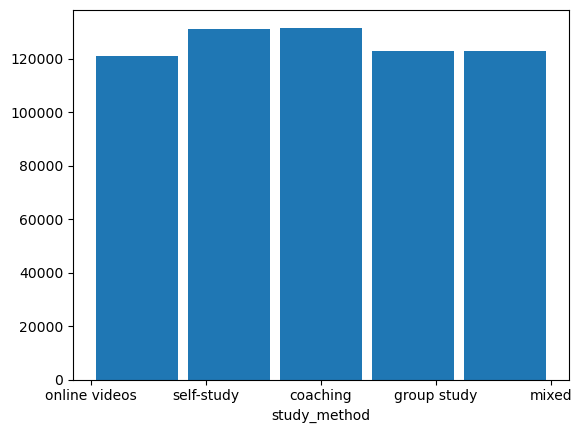

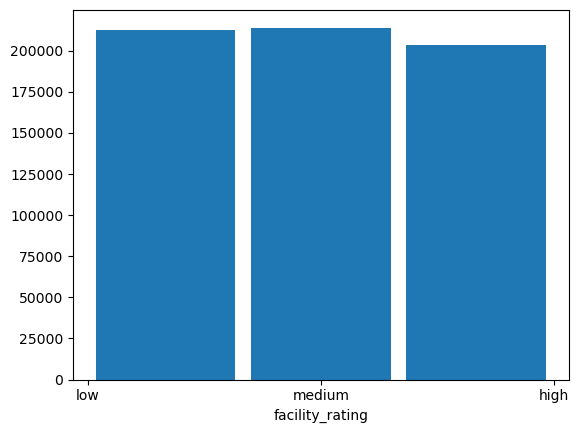

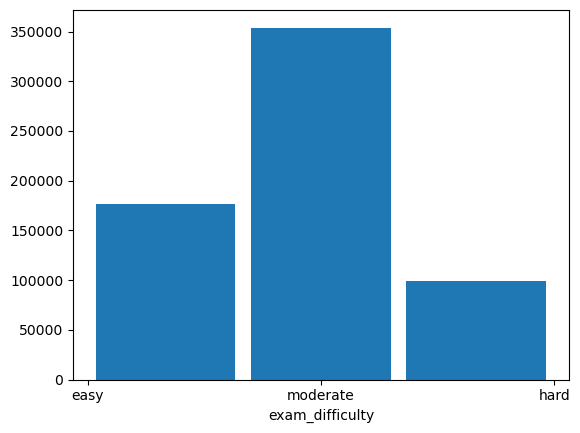

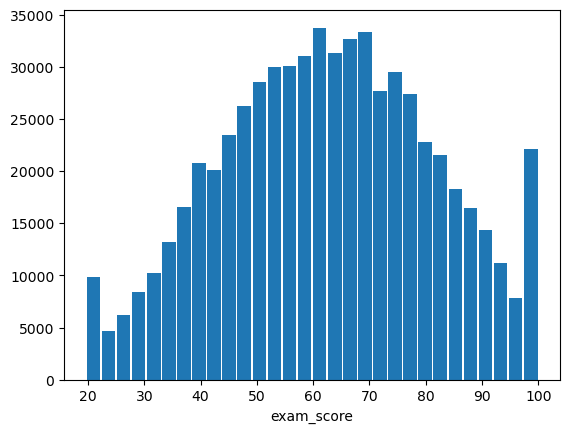

In [49]:
for i in df.columns:
    no_bins = min(df[i].nunique(), 30)
    plt.hist(df[i], bins=no_bins, rwidth=0.9)
    plt.xlabel(i)
    plt.show()

### 1.5 Encoding data

In [50]:
# Label encoding manually
df.sleep_quality = df.sleep_quality.map({"poor":1, "average":2, "good":3})
df.facility_rating = df.facility_rating.map({"low":1, "medium":2, "high":3})
df.exam_difficulty = df.exam_difficulty.map({"easy":1, "moderate":2, "hard":3})

In [ ]:
# One-hot encoding other categorical variables
df = pd.get_dummies(df, columns=["gender", "course", "internet_access", "study_method"], drop_first= True, dtype=int)

In [53]:
df.head()

,age,study_hours,class_attendance,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,gender_male,gender_other,...,course_b.tech,course_ba,course_bba,course_bca,course_diploma,internet_access_yes,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,21,7.91,98.8,4.9,2,1,1,78.3,0,0,...,0,0,0,0,0,0,0,0,1,0
1,18,4.95,94.8,4.7,1,2,2,46.7,0,1,...,0,0,0,0,1,1,0,0,0,1
2,20,4.68,92.6,5.8,1,3,2,99.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,19,2.00,49.5,8.3,2,3,2,63.9,1,0,...,0,0,0,0,0,1,1,0,0,0
4,23,7.65,86.9,9.6,3,3,1,100.0,1,0,...,0,0,0,1,0,1,0,0,0,1


### 1.6 Splitting the dataframe to predictors and target variable

In [54]:
x = df.drop("exam_score", axis=1) # axis = 1 says that we are dropping a column
y = df["exam_score"]

# 2 Multicollinearity

### 2.1 correlation matrix

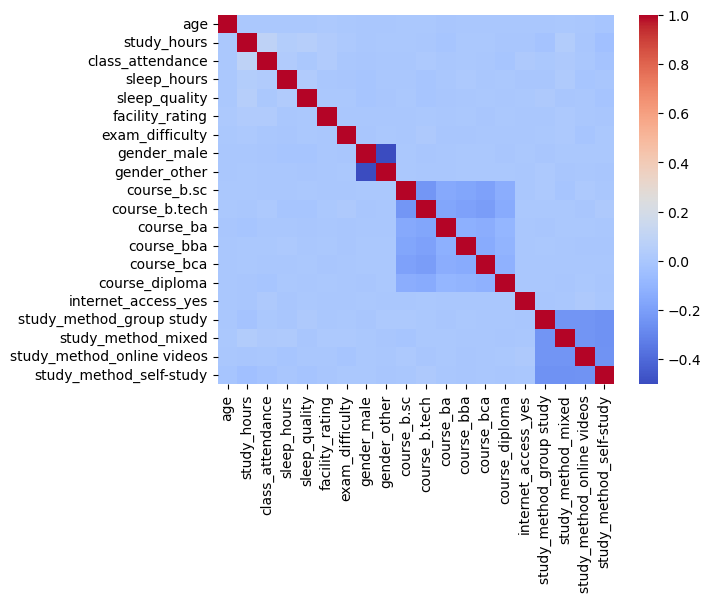

In [59]:
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.show()

### 2.2 VIF

In [65]:
vif_data = pd.DataFrame()

x_vif = add_constant(x)
vif_data["feature"] = x_vif.columns
vif_data["VIF"] = [variance_inflation_factor(x_vif.values, i) for i in range(len(x_vif.columns))]

print(vif_data.sort_values(by="VIF", ascending= True))

                       feature         VIF
1                          age    1.000450
16         internet_access_yes    1.000726
7              exam_difficulty    1.000903
6              facility_rating    1.002049
4                  sleep_hours    1.004210
5                sleep_quality    1.004636
3             class_attendance    1.010348
2                  study_hours    1.016744
15              course_diploma    1.335658
9                 gender_other    1.339890
8                  gender_male    1.340036
12                   course_ba    1.406036
13                  course_bba    1.480602
14                  course_bca    1.546601
19  study_method_online videos    1.552451
18          study_method_mixed    1.558044
17    study_method_group study    1.559863
20     study_method_self-study    1.586200
10                 course_b.sc    1.651562
11               course_b.tech    1.730614
0                        const  157.152651


# 3 Models

### 3.1 Linear Regression